# Task 1

#### Initialisation
First we need to load all the important libraries.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from torch.utils.data import TensorDataset, DataLoader

sb.set()

### Reading data
We are using SciPy to read the `.mat` file.

In [ ]:
data = loadmat('OQC.mat')['data']
data

array([[0.39052473, 0.14779758, 0.1563981 , ..., 0.07962529, 0.92246927,
        2.        ],
       [0.39052473, 0.14779758, 0.1563981 , ..., 0.05367681, 0.92148159,
        2.        ],
       [0.5084938 , 0.14779758, 0.1563981 , ..., 0.05611241, 0.9204939 ,
        2.        ],
       ...,
       [0.54001505, 0.00982888, 0.77251185, ..., 0.05611241, 0.93135813,
        0.        ],
       [0.60664394, 0.00982888, 0.77251185, ..., 0.05658079, 0.93086416,
        0.        ],
       [0.7189506 , 0.00982888, 0.77251185, ..., 0.05658079, 0.93086416,
        0.        ]])

Next we will add column names to the DataFrame for easy reference.

In [ ]:
data = pd.DataFrame(data,
                    columns=[
                            'screw_volume', 
                            'material_cushion', 
                            'dosage_time', 
                            'cycle_time', 
                            'mould_heating_circuit_1', 
                            'mould_heating_circuit_2', 
                            'mould_heating_circuit_3', 
                            'mould_heating_circuit_4', 
                            'mould_heating_circuit_5', 
                            'mould_heating_circuit_6', 
                            'plotting_point_2', 
                            'injection_speed', 
                            'injection_flow', 
                            'switch_over_volume', 
                            'maximum_injection_pressure', 
                            'injection_time', 
                            'cylinder_heating_zone_1', 
                            'cylinder_heating_zone_2', 
                            'cylinder_heating_zone_3', 
                            'cylinder_heating_zone_4', 
                            'cylinder_heating_zone_5', 
                            'opening_force', 
                            'opening_speed', 
                            'oil_temperature', 
                            'mould_temperature', 
                            'nozzle_stroke', 
                            'closing_speed', 
                            'advancement_speed', 
                            'retraction_speed', 
                            'mould_protection_force', 
                            'temperature_of_support_housing', 
                            'circumferential_speed', 
                            'ejector_pressure_nominal', 
                            'ejector_pressure_actual', 
                            'nozzle_1_flow', 
                            'nozzle_1_pressure', 
                            'injection_torque', 
                            'injection_rotational_speed', 
                            'injection_force_screw_1', 
                            'dosage_torque', 
                            'dosage_rotational_speed', 
                            'hydraulic_accumulator_pressure', 
                            'charge_pressure_of_accumulator', 
                            'mould_entry_time', 
                            'part_removal_time', 
                            'maximum_injection_pressure', 
                            'back_pressure', 
                            'clamping_force', 
                            'output_class'
                    ])

Save as `csv` to checkpoint.

In [ ]:
data.to_csv('OQC.csv')

In [ ]:
data = pd.read_csv('OQC.csv')
data = data.drop(data.columns[0], axis=1)

View data.

In [ ]:
data.head()

,screw_volume,material_cushion,dosage_time,cycle_time,mould_heating_circuit_1,mould_heating_circuit_2,mould_heating_circuit_3,mould_heating_circuit_4,mould_heating_circuit_5,mould_heating_circuit_6,...,dosage_torque,dosage_rotational_speed,hydraulic_accumulator_pressure,charge_pressure_of_accumulator,mould_entry_time,part_removal_time,maximum_injection_pressure.1,back_pressure,clamping_force,output_class
0,0.390525,0.147798,0.156398,0.00256,0.555556,0.777778,0.555556,0.714286,0.50,0.5,...,0.719864,0.037255,0.329627,1.0,0.000038,0.125,0.078970,0.079625,0.922469,2.0
1,0.390525,0.147798,0.156398,0.00256,0.444444,0.666667,0.555556,0.714286,0.25,0.5,...,0.719864,0.072549,0.328711,1.0,0.000038,0.125,0.053677,0.053677,0.921482,2.0
2,0.508494,0.147798,0.156398,0.00256,0.444444,0.666667,0.555556,0.714286,0.25,0.5,...,0.842105,0.994118,0.326533,1.0,0.000038,0.125,0.056112,0.056112,0.920494,2.0
3,0.577954,0.147798,0.156398,0.00256,0.444444,0.666667,0.444444,0.571429,0.50,0.5,...,0.877759,0.994118,0.326533,1.0,0.000038,0.125,0.056206,0.057424,0.920494,2.0
4,0.649490,0.147798,0.156398,0.00256,0.555556,0.666667,0.444444,0.571429,0.50,0.5,...,0.874363,0.996078,0.323210,1.0,0.000038,0.125,0.057705,0.056112,0.920000,2.0


We can see that this DataFrame has 48 columns of input data and the last column is the classification of the moulds.

In [ ]:
data.shape

(2952, 49)

### Data Preperation

Using SciKit's train test split, we will divide the data into training and testing sets.

In [ ]:
X = data.drop('output_class', axis=1)
y = data['output_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating model template

Here I am building a dynamic model template that I can set the parameters of on the go. This will save time and space.

In [ ]:
class three_plus_n_layer_network(nn.Module):

    def __init__(self, hidden_nodes=8):
        super(three_plus_n_layer_network, self).__init__()
        self.input_layer = nn.Linear(48, hidden_nodes)
        self.hidden_layer = nn.Linear(hidden_nodes, hidden_nodes)
        self.output_layer = nn.Linear(hidden_nodes, 3)
    
    def forward(self, x, n=0):
        x = self.input_layer(x)
        for _ in range(n):
            x = self.hidden_layer(x)
        x = self.output_layer(x)
        prob = F.softmax(x, dim=1)
        return prob

### Create Training Template
These are the training functions that will train and evaluate the models. `train` is the function that receives the parameters and iterates over the different values and `_train` is where the training and testing happens.

In [ ]:
def _train(batch, node, rate, epoch, n):
    # Setup training dataset
    batch_X_train = torch.tensor(X_train.values)
    batch_y_train = torch.tensor(y_train.values)
    dataset = TensorDataset(batch_X_train, batch_y_train)
    data_loader = DataLoader(dataset, batch)

    # Setup testing dataset
    batch_X_test = torch.tensor(X_test.values)
    batch_y_test = torch.tensor(y_test.values)
    test_dataset = TensorDataset(batch_X_test, batch_y_test)
    test_loader = DataLoader(test_dataset, batch)

    # Create Net
    net = three_plus_n_layer_network(node)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=rate)

    # Train network
    for i, data in enumerate(data_loader):
        if i >= epoch:
            break
        inputs, labels = data
        inputs.requires_grad_()
        optimizer.zero_grad()
        outputs = net(inputs.float(), n)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

    # Test Network on loss
    loss=[]
    # Test Network on accuracy
    total = 0
    correct = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            loss.append(criterion(inputs.float(), labels.long()).item())
            outputs = net(inputs.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    # Return loss
    return np.mean(loss), correct/total

def train(batch_size=[1], node_size=[8], epochs=[100], learning_rate=[0.05], layer_size=[0]):
    loss = []
    accuracy = []
    batches = []
    nodes = []
    rates = []
    epoches = []
    layers = []

    # Test every batch size
    for batch in batch_size:
        # Test every number of nodes in hidden layer
        for node in node_size:
            # Test every learning rate
            for rate in learning_rate:
                # Test every number of epochs
                for epoch in epochs:
                    # Test every depth
                    for n in layer_size:
                        iteration = []
                        # Repeat experiment 10 times for consistency
                        for i in range(10):
                            iteration.append(_train(batch, node, rate, epoch, n))
                        # Save data
                        _loss, _accuracy = np.mean(iteration, axis=0)
                        loss.append(_loss)
                        accuracy.append(_accuracy)
                        batches.append(batch)
                        nodes.append(node)
                        rates.append(rate)
                        epoches.append(epoch)
                        layers.append(n+1)
                        print('batch:', batch, 'node:', node, 'rate:', rate, 'epoch:', epoch, 'depth', n)
    return loss, accuracy, batches, nodes, rates, epoches, layers

### Training models
Here is where we will iterate over the various parameters. These parameters have been chosen to cover a wide spectrum of possible values to gain a thorough understanding of how they work together to fit the best possible model.

In [ ]:
loss, accuracy, batches, nodes, rates, epoches, layers = train(
        batch_size=[1, 4, 8, 16, 32, 64], 
        node_size=[1, 4, 8, 16, 32, 64], 
        epochs=[1, 100, 200, 400, 800, 1600], 
        learning_rate=[0.001, 0.005, 0.01, 0.05, 0.1],
        layer_size=[0]
    )

Saving the data into a DataFrame for easy reference.

In [ ]:
results = pd.DataFrame(data = {
    'batch_size': batches,
    'node_size': nodes,
    'learning_rate': rates,
    'epochs': epoches,
    'loss': loss,
    'accuracy': accuracy
})

Checkpoint

In [ ]:
results.to_csv('results.csv')

In [ ]:
results = pd.read_csv('results.csv')
results = results.drop(results.columns[0], axis=1)

In [ ]:
results.head()

,batch_size,node_size,learning_rate,epochs,loss,accuracy
0,1,1,0.001,1,3.916989,0.337020
1,1,1,0.001,100,3.916989,0.320203
2,1,1,0.001,200,3.916989,0.328781
3,1,1,0.001,400,3.916989,0.346275
4,1,1,0.001,800,3.916989,0.338600


### Results visualisation.

Below are categorical plots of the various metrics.

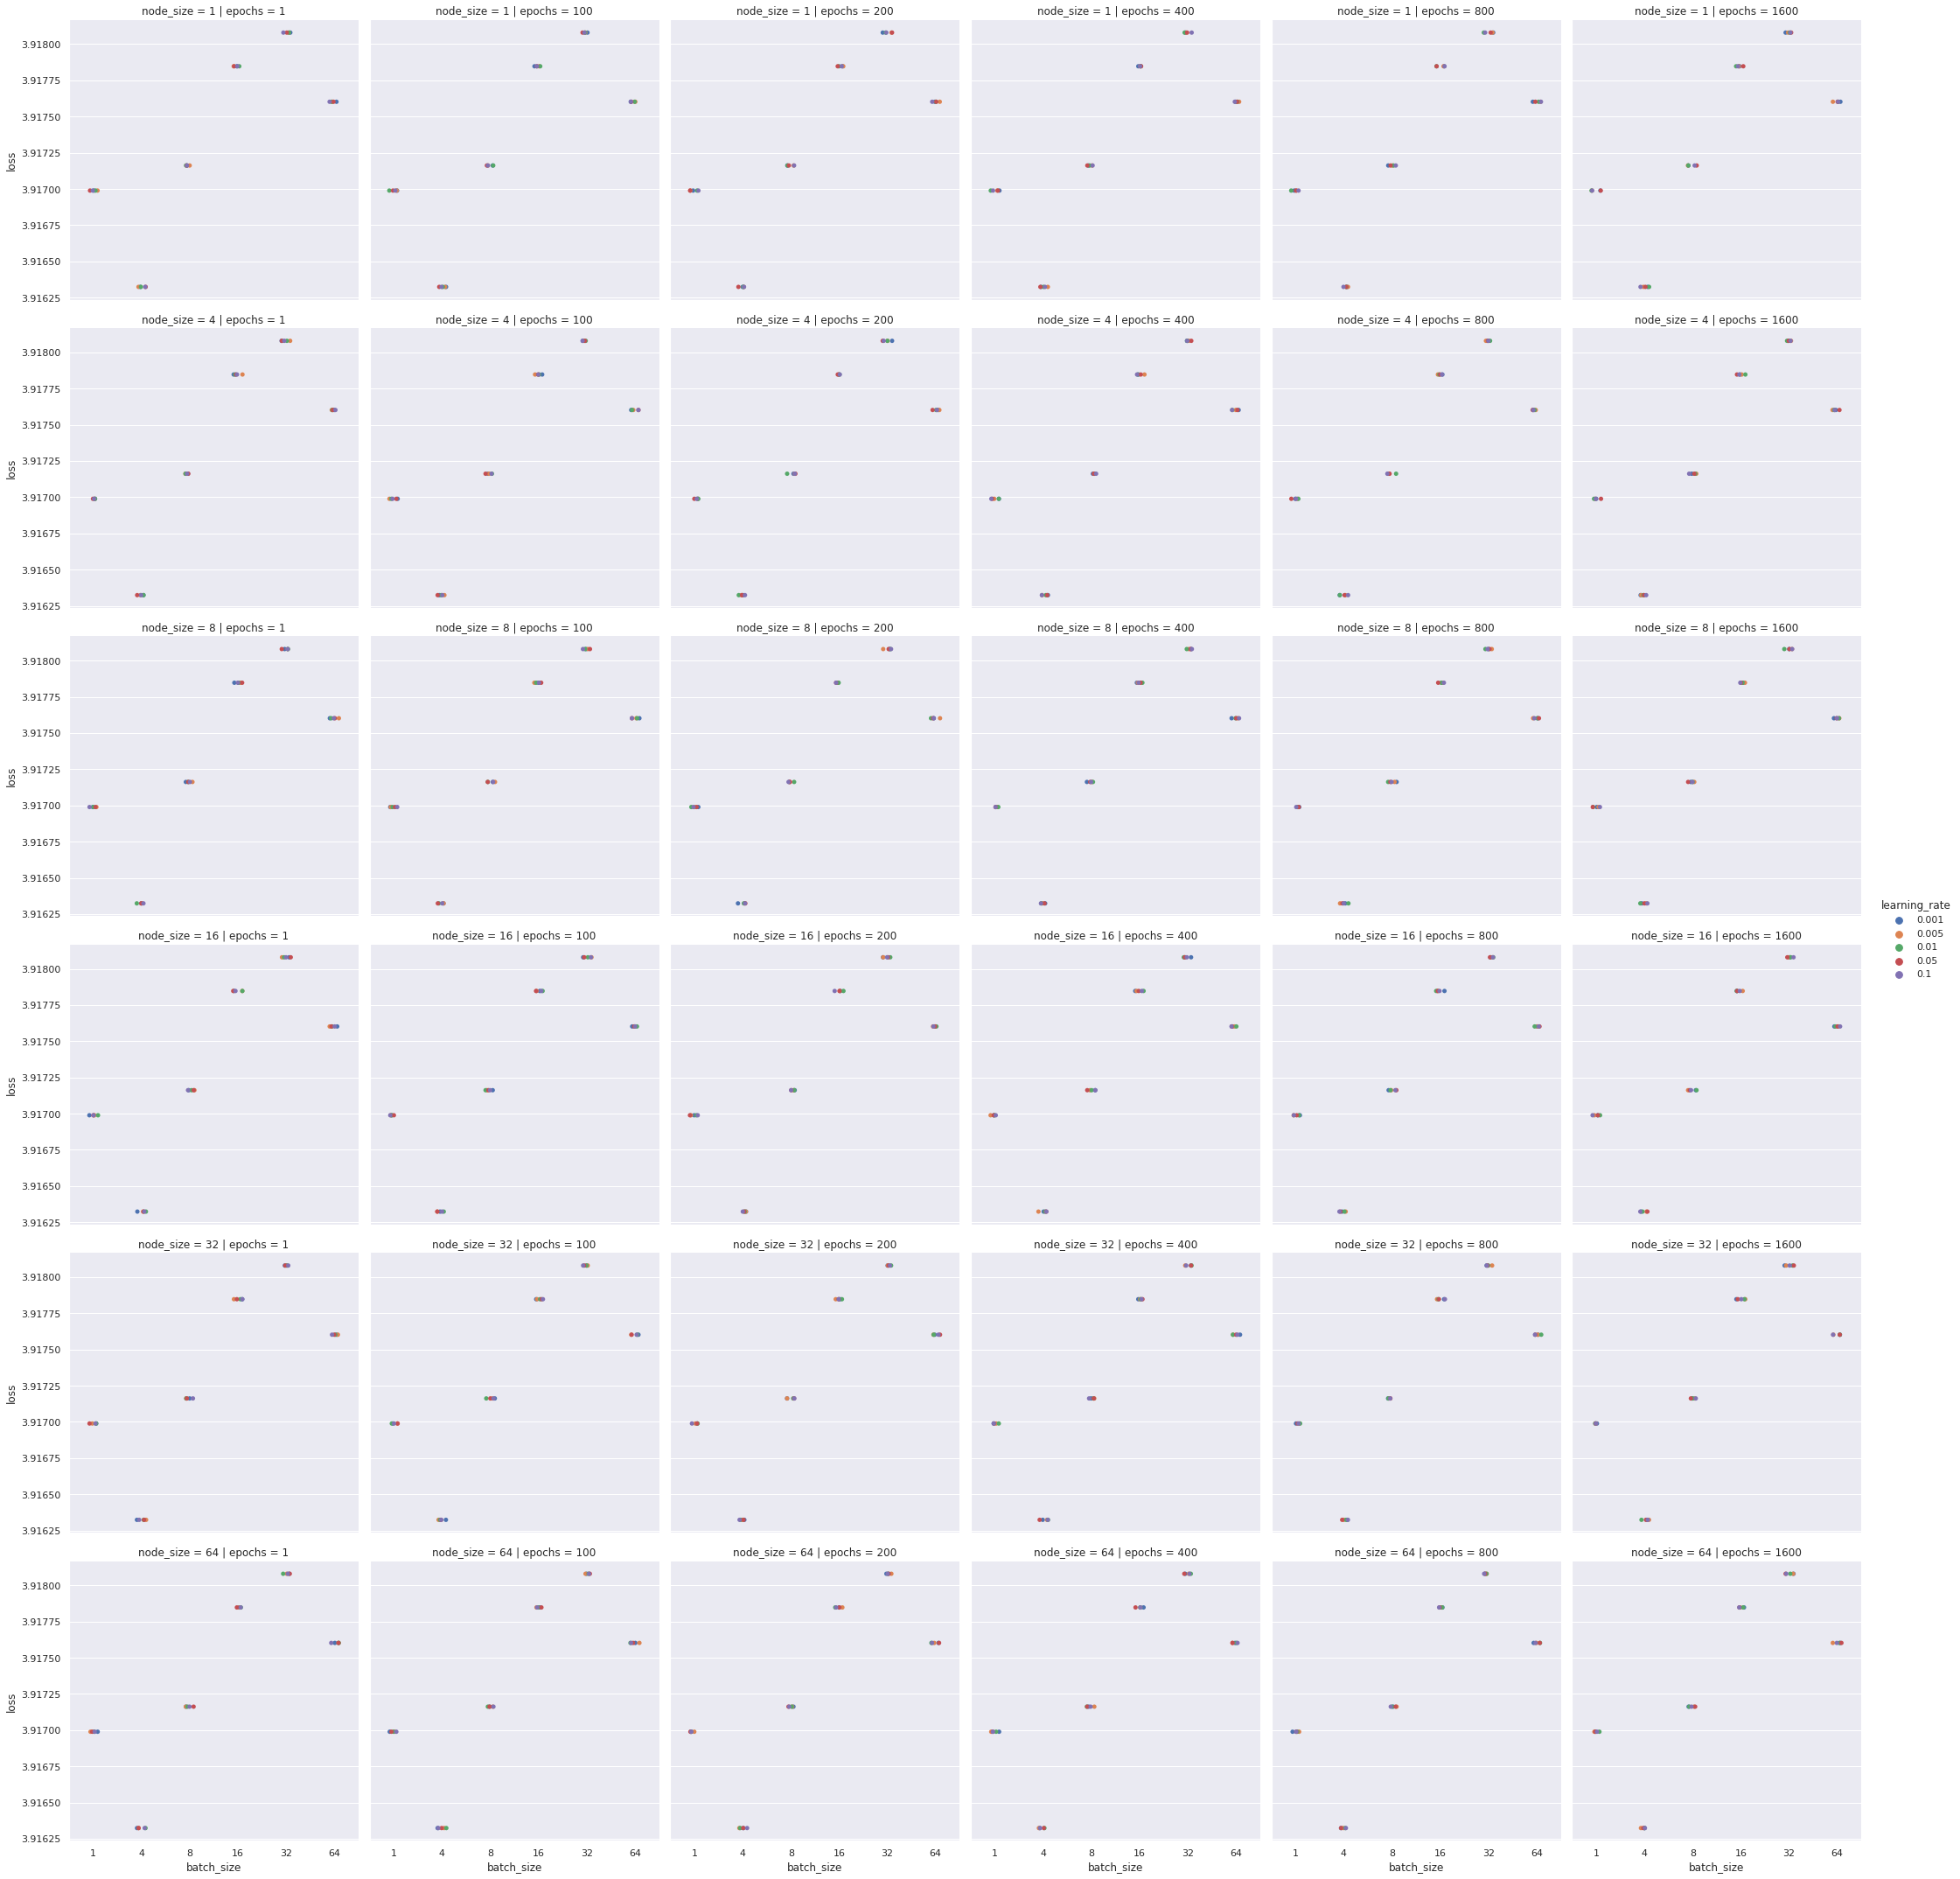

In [ ]:
sb.catplot(x="batch_size", y="loss", row="node_size", col='epochs', hue='learning_rate', data=results)

Sorting the data to retrieve the best possible solution based on loss.

In [ ]:
results.sort_values(by=['loss', 'epochs', 'learning_rate', 'node_size', 'batch_size'], inplace=True, ignore_index=True)
results.head()

,batch_size,node_size,learning_rate,epochs,loss,accuracy
0,4,1,0.001,1,3.916324,0.333183
1,4,4,0.001,1,3.916324,0.338375
2,4,8,0.001,1,3.916324,0.329233
3,4,16,0.001,1,3.916324,0.306546
4,4,32,0.001,1,3.916324,0.331828


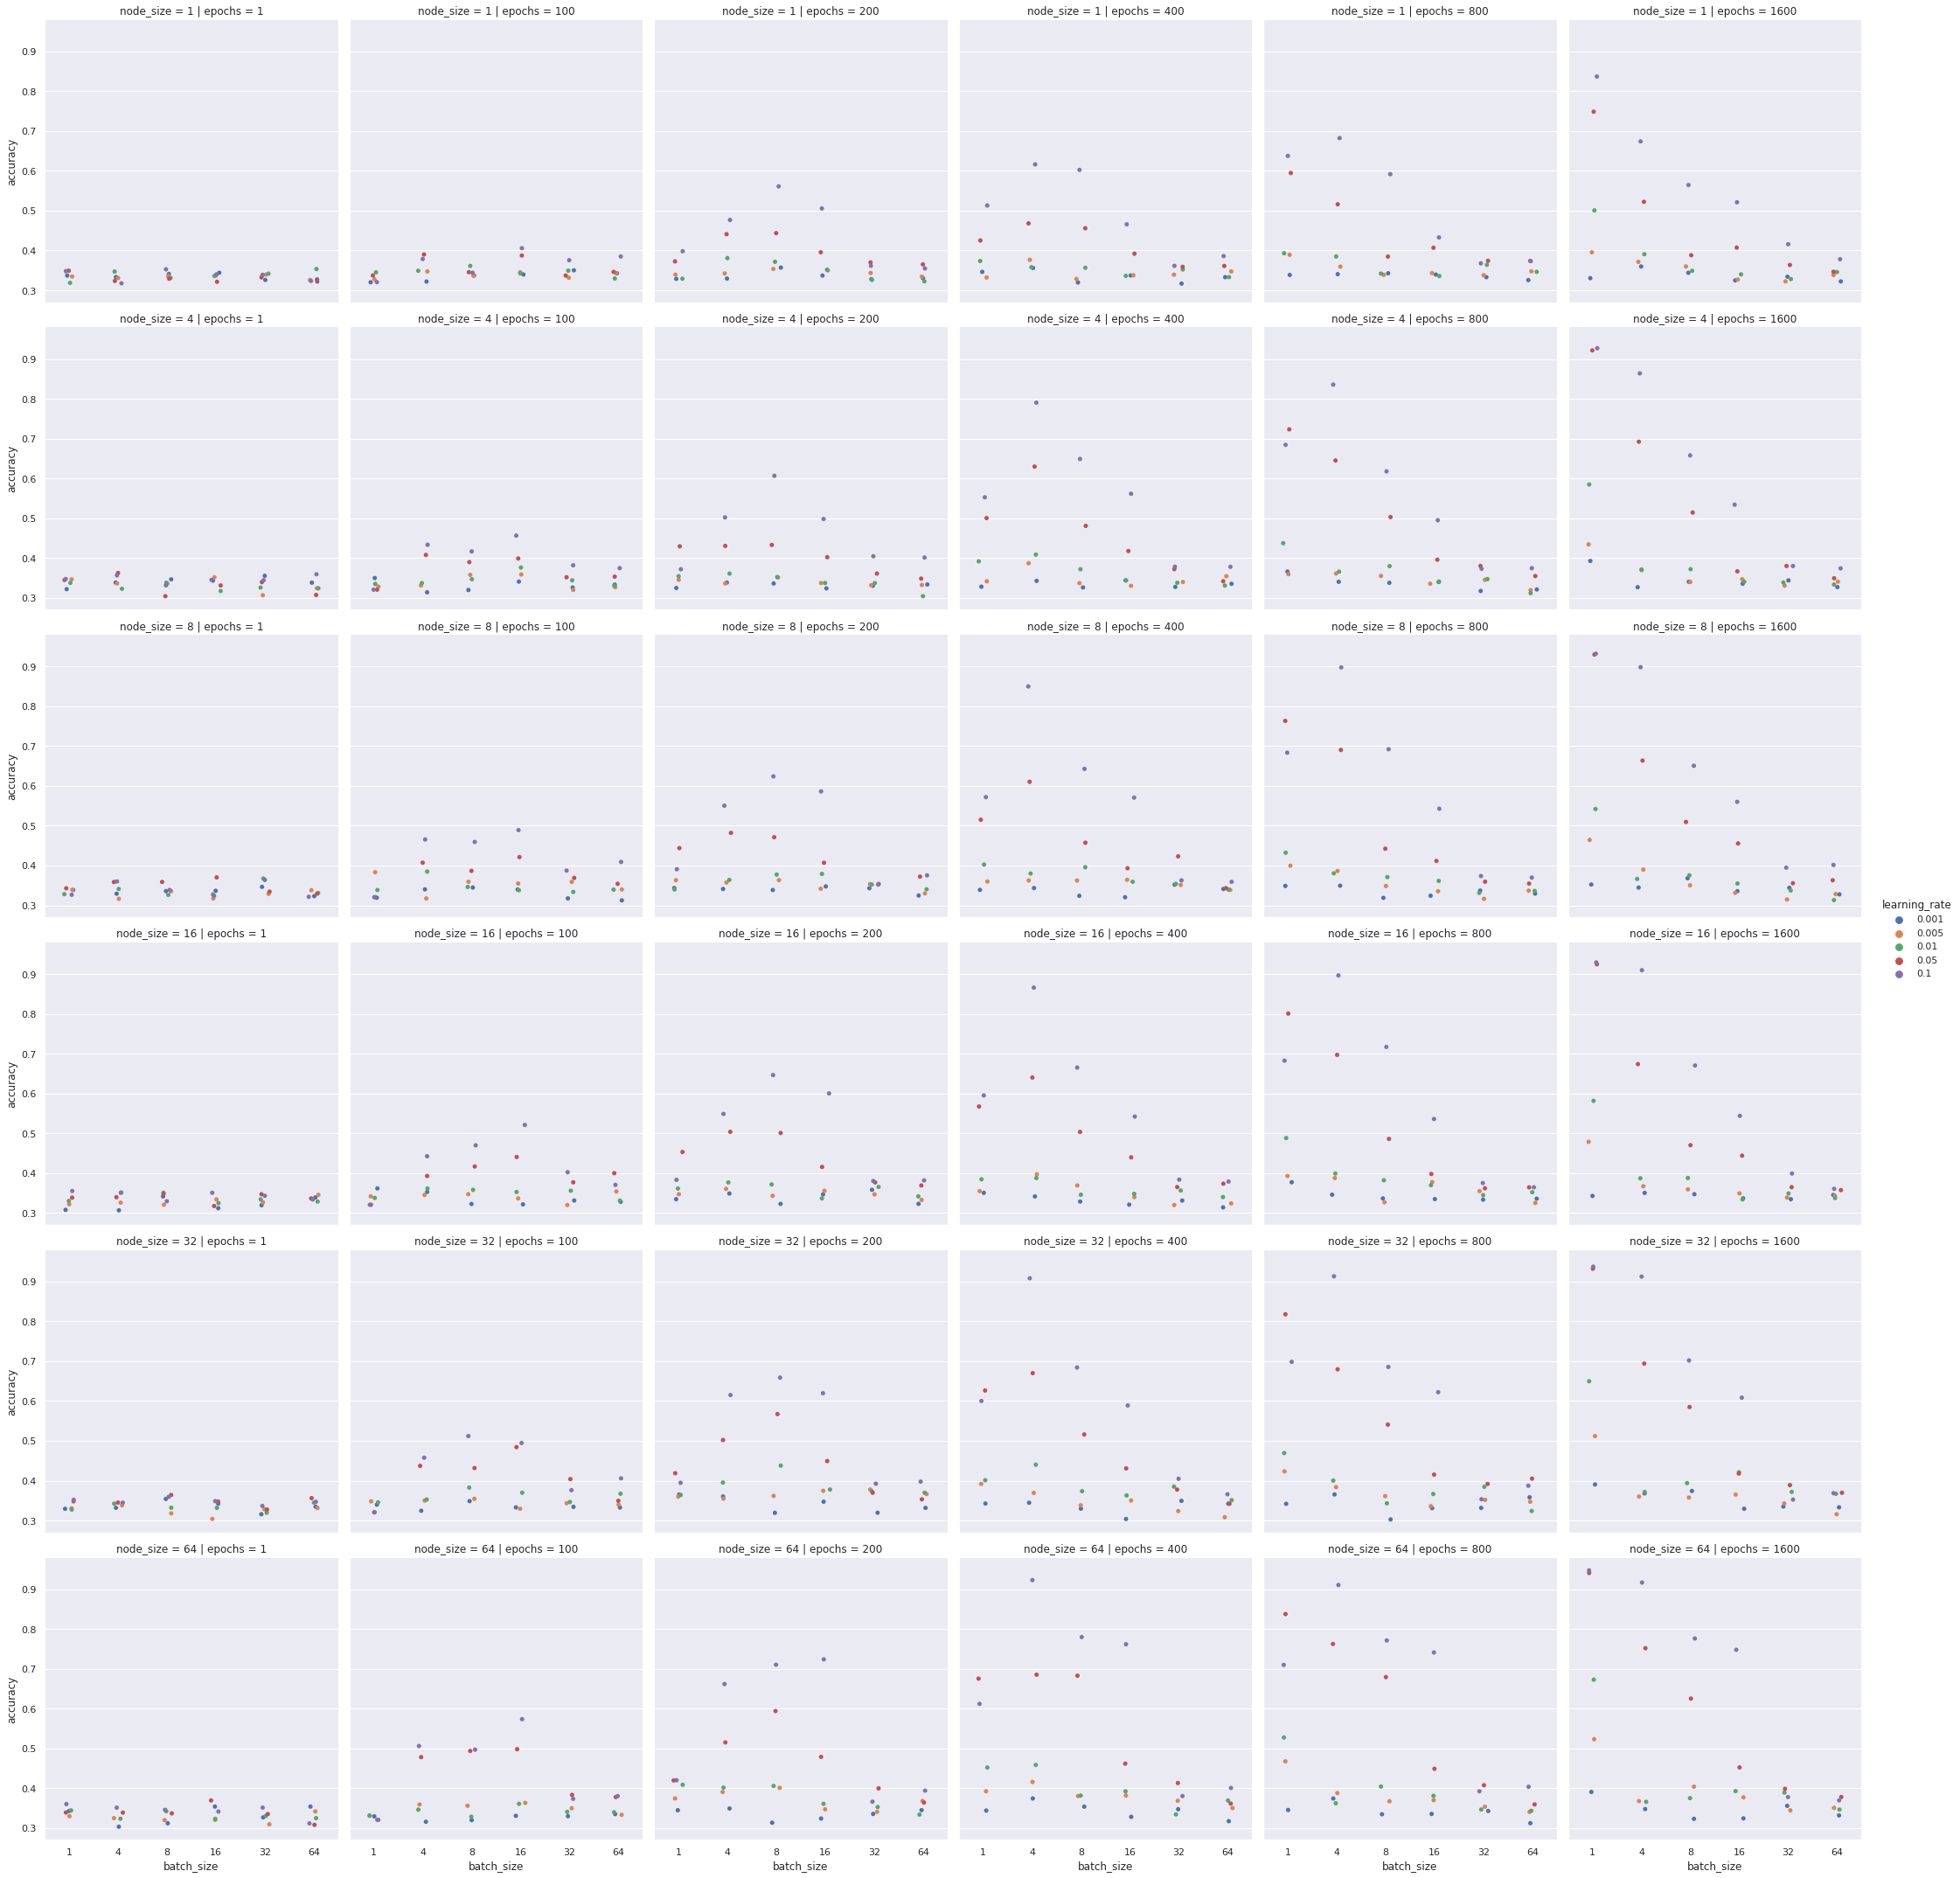

In [ ]:
sb.catplot(x="batch_size", y="accuracy", row="node_size", col='epochs', hue='learning_rate', data=results)

Sorting the data to retrieve the best possible solution based on accuracy.

In [ ]:
results.sort_values(by='accuracy', ascending=False, inplace=True, ignore_index=True)
results.head()

,batch_size,node_size,learning_rate,epochs,loss,accuracy
0,1,64,0.10,1600,3.916989,0.946953
1,1,64,0.05,1600,3.916989,0.940519
2,1,32,0.10,1600,3.916989,0.937359
3,1,32,0.05,1600,3.916989,0.932280
4,1,8,0.10,1600,3.916989,0.932054


### Result

As we can see from the graphs and the DataFrames above, the loss tends to converge as early as 1 epoch based on the number of nodes. Accuracy however tells a different story where the best result is attained with:
> - `batch_size`: 1 
> - `node_size`: 64
> - `learning_rate`: 0.1
> - `epochs`: 1600.


# Task 2

### Width
A wider network tends to provide higher accuracies with no appreciable difference in loss.

In [ ]:
results.groupby('node_size')[['accuracy', 'loss']].mean()

,accuracy,loss
node_size,,
1,0.377146,3.917334
4,0.391857,3.917334
8,0.399332,3.917334
16,0.402190,3.917334
32,0.412417,3.917334
64,0.425009,3.917334


### Depth
We shall now look at the impact of depth on the network. We shall take networks of differing depths and train them while using the optimal parameters found in Task 1.

In [ ]:
loss, accuracy, batches, nodes, rates, epoches, layers = train(
        batch_size=[1], 
        node_size=[64], 
        epochs=[1600], 
        learning_rate=[0.1],
        layer_size=[0, 1, 3, 7]
    )

In [ ]:
results_depth = pd.DataFrame(data = {
    'batch_size': batches,
    'node_size': nodes,
    'learning_rate': rates,
    'epochs': epoches,
    'hidden_layers': layers,
    'loss': loss,
    'accuracy': accuracy
})

Checkpoint

In [ ]:
results_depth.to_csv('results_depth.csv')

In [ ]:
results_depth = pd.read_csv('results_depth.csv')
results_depth = results_depth.drop(results_depth.columns[0], axis=1)

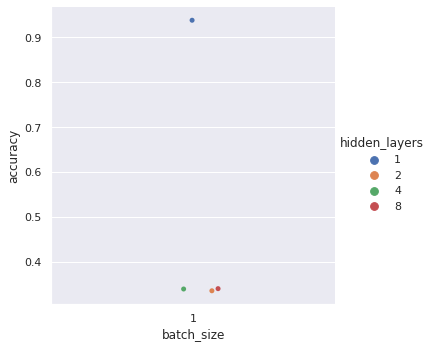

In [ ]:
sb.catplot(x="batch_size", y="accuracy", hue='hidden_layers', data=results_depth)

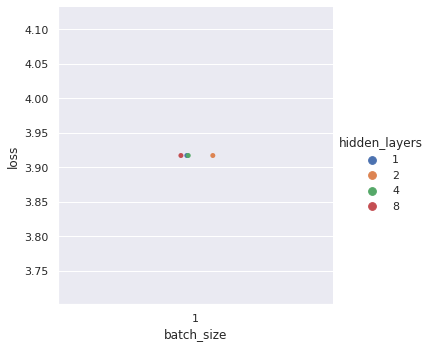

In [ ]:
sb.catplot(x="batch_size", y="loss", hue='hidden_layers', data=results_depth)

### Results

As we can see from the plot above, 1 hidden layer provides the optimum performance with no appreciable difference in loss. The wider the network, the better it seems to perform as well. 

# Task 3

We will now look at the impact of learning rates

In [ ]:
results.groupby('learning_rate')[['accuracy', 'loss']].mean()

,accuracy,loss
learning_rate,,
0.001,0.336872,3.917334
0.005,0.351724,3.917334
0.010,0.365162,3.917334
0.050,0.447054,3.917334
0.100,0.505813,3.917334


### Results
As we can see from the above table, increasing learning rate increases test accuracy with no appreciable difference in loss. In practice, we should have adaptive learning rates that decay with time. this is so that we can initially move quickly in the direction of the optimum solution and gradually over the epochs finesse it to be as close as possible to the optimum solution. 

# Task 4

Next we will look at the effect of batch size.

In [ ]:
results.groupby('batch_size')[['accuracy', 'loss']].mean()

,accuracy,loss
batch_size,,
1,0.444826,3.916989
4,0.451095,3.916324
8,0.418170,3.917162
16,0.393734,3.917847
32,0.352874,3.918080
64,0.347252,3.917602


### Results
As we can see from the above table, a batch size of 4 gives the highest mean accuracy and lowest loss. However when looking at the individual results as done above in Task 1, we can see that a `batch_size` of 1 yields the best result. This is probably due to the small problem size. In larger problemsets with millions of data points, larger batches of data might have better accuracies and losses.


# Conclusion

As we can see from the above experiments, the structure of the neural network has a great impact on the kind of results that it can generate. Surprisingly while the loss remained similar across experiments, the accuracy tended to change. In terms of complexity, it is also pretty evident that training the model for more epochs will take more time. Training in larger batch sizes will also increase compute time per epoch. Ultimately, it is possible to detect faulty moulds to a high degree of accuracy.